<img src = "https://raw.githubusercontent.com/alvianfirdaus/Kelompok3_ML/main/Kuis%201/img/header.png"><p>

----

<table>
  <tr>
    <th>Nama Mata Kuliah </th>
    <td>Pembelajaran Mesin / Mechine Learning</td>
  </tr>
  <tr>
    <th>Topik</th>
    <td>UTS | Pertemuan 8 | Segmentasi Gambar menggunakan K means</td>
  </tr>
  <tr>
    <th>Dosen</th>
    <td>Muhammad Afif Hendawan, S.Kom., M.T. </td>
  </tr>
  <tr>
    <th>Kelompok</th>
    <td>Kelompok 3</td>
  </tr>
  <tr>
    <th>Nama Anggota Kelompok</th>
    <td><p>
    - Alvian Nur Firdaus<p>
    - Devi Andini Febrianti<p>
    - Febrian Dhani Ritonga<p>
    - Naresh Pratista<p>
    - Zahra Annisa Wahono<p></td>
  </tr>
  <tr>
    <th>Hasil Pengerjaan</th>
    <td><p>
    Naresh Pratista<p>
</td>
  </tr>
</table>

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# Fungsi untuk menampilkan citra
def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

In [ ]:
# Fungsi untuk mengonversi citra ke grayscale
def convert_to_grayscale(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

In [ ]:
# Fungsi untuk segmentasi citra grayscale dengan K-Means
def kmeans_segmentation_gray(image, k):
    # Ubah citra grayscale menjadi array 2D
    pixels = image.reshape(-1, 1).astype(np.float32)

    # Inisialisasi K-Means dengan k cluster
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    kmeans.fit(pixels)

    # Prediksi label setiap piksel
    labels = kmeans.predict(pixels)

    # Rekonstruksi citra hasil segmentasi
    segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)

    # Kembalikan citra hasil segmentasi
    return segmented_image

In [ ]:
# Fungsi untuk melakukan clustering pada citra grayscale
def kmeans_clustering_gray(image, k):
    # Ubah citra grayscale menjadi array 2D
    pixels = image.reshape(-1, 1).astype(np.float32)

    # Inisialisasi K-Means dengan k cluster
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    kmeans.fit(pixels)

    # Mendapatkan label setiap piksel
    labels = kmeans.predict(pixels)

    # Mendapatkan pusat cluster
    cluster_centers = kmeans.cluster_centers_

    return labels, cluster_centers


In [ ]:
# Fungsi untuk menghitung akurasi
def hitung_akurasi(teks_asli, teks_ekstraksi):
    teks_asli = ''.join(e for e in teks_asli if e.isalnum()).lower()
    teks_ekstraksi = ''.join(e for e in teks_ekstraksi if e.isalnum()).lower()
    return 100.0 if teks_asli == teks_ekstraksi else 0.0

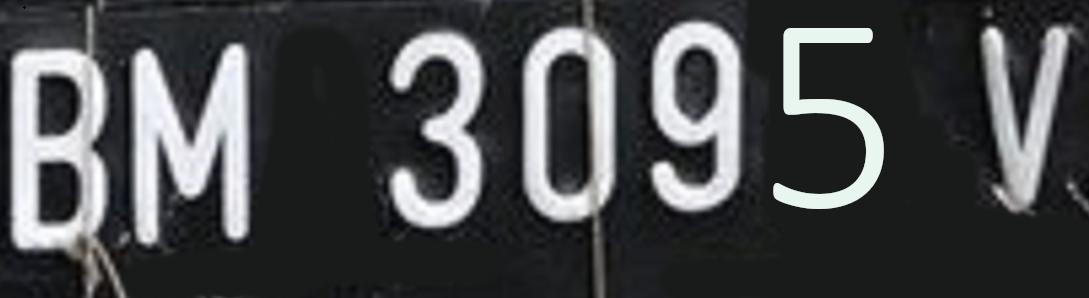

In [ ]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dummy/43.jpg')

# Ubah citra ke format RGB (OpenCV membaca citra dalam format BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

In [ ]:
# Mengonversi citra ke grayscale
gray_image = convert_to_grayscale(img)

In [ ]:
# Melakukan Gaussian Blur (Smoothing)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

In [ ]:
# Melakukan thresholding
_, thresholded_image = cv2.threshold(blurred_image, 128, 255, cv2.THRESH_BINARY)

In [ ]:
# Melakukan segmentasi K-Means pada citra thresholded
k_segments = 4  # Jumlah cluster untuk segmentasi
segmented_image = kmeans_segmentation_gray(thresholded_image, k_segments)

<ipython-input-93-c4e96db6ea9e>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(pixels)


<ipython-input-94-0c1608e3a62b>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(pixels)


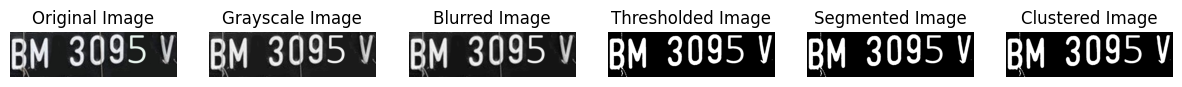

In [ ]:
# Melakukan clustering pada citra grayscale yang telah di-segmentasi
k_clusters = 3  # Jumlah cluster untuk clustering
labels, cluster_centers = kmeans_clustering_gray(segmented_image, k_clusters)

# Menampilkan citra asli, citra grayscale, hasil segmentasi, dan hasil clustering
show_images([img_rgb, gray_image, blurred_image, thresholded_image, segmented_image, cluster_centers[labels].reshape(segmented_image.shape)],
            ["Original Image", "Grayscale Image", "Blurred Image", "Thresholded Image", "Segmented Image", "Clustered Image"])

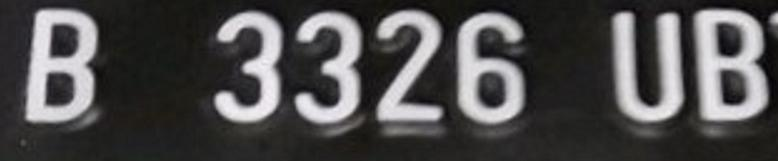

In [ ]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dummy/23.jpg')

# Ubah citra ke format RGB (OpenCV membaca citra dalam format BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

<ipython-input-93-c4e96db6ea9e>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(pixels)
<ipython-input-94-0c1608e3a62b>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(pixels)


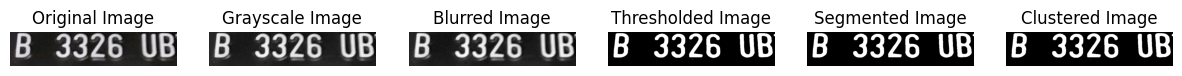

In [ ]:
# Mengonversi citra ke grayscale
gray_image = convert_to_grayscale(img)

# Melakukan Gaussian Blur (Smoothing)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Melakukan thresholding
_, thresholded_image = cv2.threshold(blurred_image, 128, 255, cv2.THRESH_BINARY)

# Melakukan segmentasi K-Means pada citra thresholded
k_segments = 4  # Jumlah cluster untuk segmentasi
segmented_image = kmeans_segmentation_gray(thresholded_image, k_segments)

# Melakukan clustering pada citra grayscale yang telah di-segmentasi
k_clusters = 3  # Jumlah cluster untuk clustering
labels, cluster_centers = kmeans_clustering_gray(segmented_image, k_clusters)

# Menampilkan citra asli, citra grayscale, hasil segmentasi, dan hasil clustering
show_images([img_rgb, gray_image, blurred_image, thresholded_image, segmented_image, cluster_centers[labels].reshape(segmented_image.shape)],
            ["Original Image", "Grayscale Image", "Blurred Image", "Thresholded Image", "Segmented Image", "Clustered Image"])

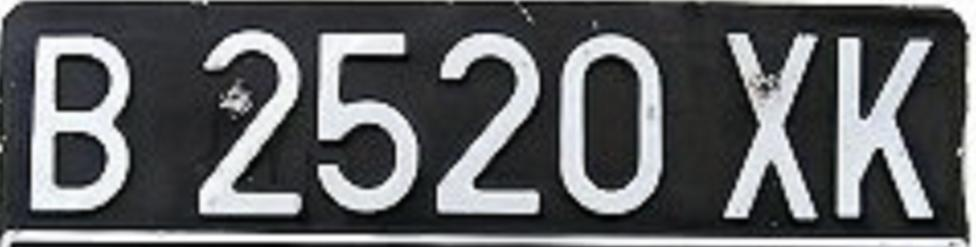

In [ ]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dummy/21.jpg')

# Ubah citra ke format RGB (OpenCV membaca citra dalam format BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

<ipython-input-93-c4e96db6ea9e>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(pixels)
<ipython-input-94-0c1608e3a62b>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(pixels)


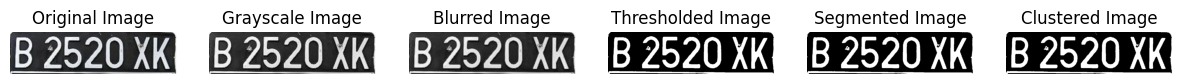

In [ ]:
# Mengonversi citra ke grayscale
gray_image = convert_to_grayscale(img)

# Melakukan Gaussian Blur (Smoothing)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Melakukan thresholding
_, thresholded_image = cv2.threshold(blurred_image, 128, 255, cv2.THRESH_BINARY)

# Melakukan segmentasi K-Means pada citra thresholded
k_segments = 4  # Jumlah cluster untuk segmentasi
segmented_image = kmeans_segmentation_gray(thresholded_image, k_segments)

# Melakukan clustering pada citra grayscale yang telah di-segmentasi
k_clusters = 3  # Jumlah cluster untuk clustering
labels, cluster_centers = kmeans_clustering_gray(segmented_image, k_clusters)

# Menampilkan citra asli, citra grayscale, hasil segmentasi, dan hasil clustering
show_images([img_rgb, gray_image, blurred_image, thresholded_image, segmented_image, cluster_centers[labels].reshape(segmented_image.shape)],
            ["Original Image", "Grayscale Image", "Blurred Image", "Thresholded Image", "Segmented Image", "Clustered Image"])

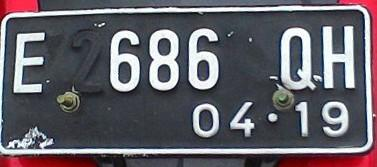

In [ ]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dummy/18.jpg')

# Ubah citra ke format RGB (OpenCV membaca citra dalam format BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

<ipython-input-61-c4e96db6ea9e>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(pixels)
<ipython-input-62-0c1608e3a62b>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(pixels)


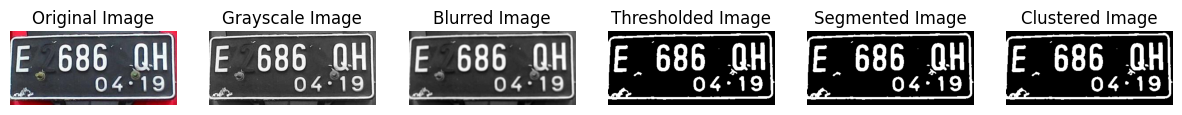

In [ ]:
# Mengonversi citra ke grayscale
gray_image = convert_to_grayscale(img)

# Melakukan Gaussian Blur (Smoothing)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Melakukan thresholding
_, thresholded_image = cv2.threshold(blurred_image, 128, 255, cv2.THRESH_BINARY)

# Melakukan segmentasi K-Means pada citra thresholded
k_segments = 4  # Jumlah cluster untuk segmentasi
segmented_image = kmeans_segmentation_gray(thresholded_image, k_segments)

# Melakukan clustering pada citra grayscale yang telah di-segmentasi
k_clusters = 3  # Jumlah cluster untuk clustering
labels, cluster_centers = kmeans_clustering_gray(segmented_image, k_clusters)

# Menampilkan citra asli, citra grayscale, hasil segmentasi, dan hasil clustering
show_images([img_rgb, gray_image, blurred_image, thresholded_image, segmented_image, cluster_centers[labels].reshape(segmented_image.shape)],
            ["Original Image", "Grayscale Image", "Blurred Image", "Thresholded Image", "Segmented Image", "Clustered Image"])

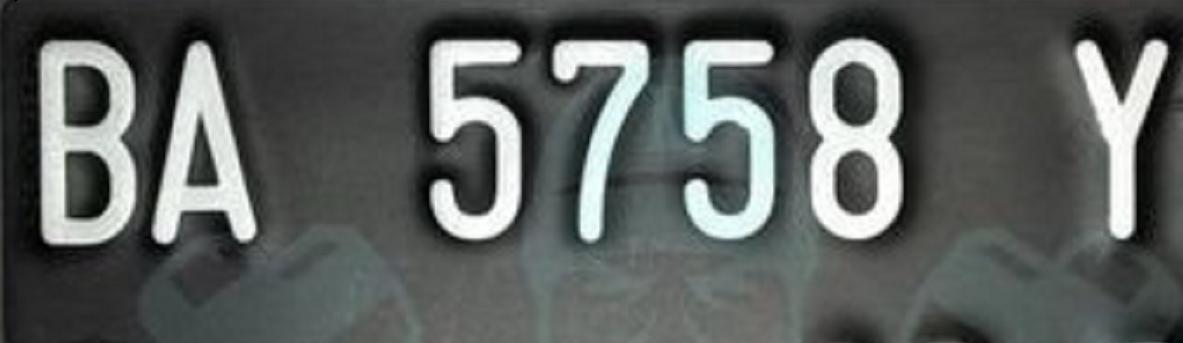

In [ ]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dummy/33.jpg')

# Ubah citra ke format RGB (OpenCV membaca citra dalam format BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

<ipython-input-61-c4e96db6ea9e>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(pixels)
<ipython-input-62-0c1608e3a62b>:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(pixels)


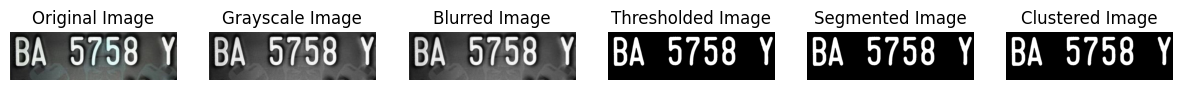

In [ ]:
# Mengonversi citra ke grayscale
gray_image = convert_to_grayscale(img)

# Melakukan Gaussian Blur (Smoothing)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Melakukan thresholding
_, thresholded_image = cv2.threshold(blurred_image, 128, 255, cv2.THRESH_BINARY)

# Melakukan segmentasi K-Means pada citra thresholded
k_segments = 4  # Jumlah cluster untuk segmentasi
segmented_image = kmeans_segmentation_gray(thresholded_image, k_segments)

# Melakukan clustering pada citra grayscale yang telah di-segmentasi
k_clusters = 3  # Jumlah cluster untuk clustering
labels, cluster_centers = kmeans_clustering_gray(segmented_image, k_clusters)

# Menampilkan citra asli, citra grayscale, hasil segmentasi, dan hasil clustering
show_images([img_rgb, gray_image, blurred_image, thresholded_image, segmented_image, cluster_centers[labels].reshape(segmented_image.shape)],
            ["Original Image", "Grayscale Image", "Blurred Image", "Thresholded Image", "Segmented Image", "Clustered Image"])

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (23.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
import pytesseract

In [ ]:
# Ekstraksi teks dari citra yang telah di-cluster
extracted_text = pytesseract.image_to_string(cluster_centers[labels].reshape(segmented_image.shape))

# Teks asli yang seharusnya ada di citra
teks_asli = "BM 3095 V"

# Menghitung akurasi
akurasi = hitung_akurasi(teks_asli, extracted_text)

OSError: ignored